<a href="https://colab.research.google.com/github/ShreyMhatre/autoencoder_from_scratch/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available! Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

CUDA is available! Using GPU.


In [2]:
transform = transforms.ToTensor()

#transform = transforms.Compose([
#   transforms.ToTensor(),
#    transforms.Normalize((0.5,), (0.5,))
#])

minst_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=minst_data, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(data_loader)
images, labels = next(dataiter)

print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # N,784
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # -> N,3
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid() # N,3 -> N,784
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
# Note: [-1,1] -> nn.Tanh

In [5]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [6]:
num_epoch = 10
outputs = []
for epoch in range(num_epoch):
    for (img, _) in data_loader:
        img = img.to(device)
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0514
Epoch:2, Loss:0.0521
Epoch:3, Loss:0.0413
Epoch:4, Loss:0.0380
Epoch:5, Loss:0.0355
Epoch:6, Loss:0.0406
Epoch:7, Loss:0.0319
Epoch:8, Loss:0.0377
Epoch:9, Loss:0.0398
Epoch:10, Loss:0.0392


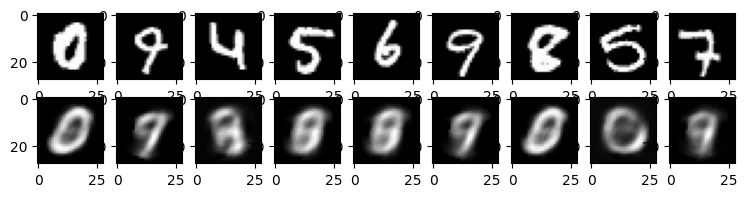

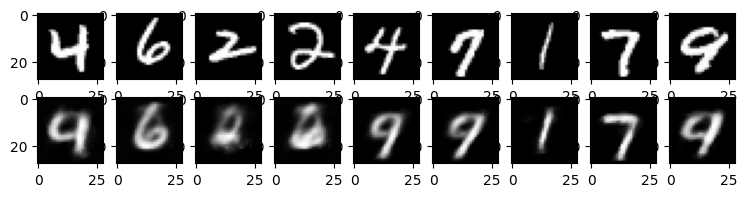

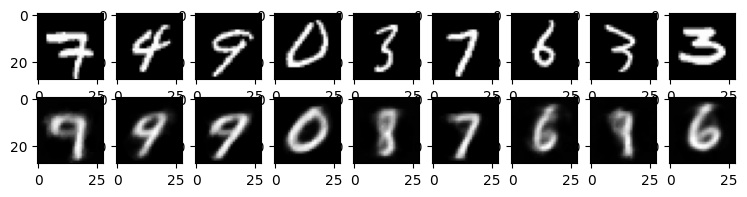

In [9]:
for k in range(0, num_epoch, 4):
  plt.figure(figsize=(9, 2))
  plt.gray()
  imgs = outputs[k][1].cpu().detach().numpy()
  recon = outputs[k][2].cpu().detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9:
      break
    plt.subplot(2, 9, 9+i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

In [14]:
class Autoencoder_CNN(nn.Module):
    def __init__(self):
      # N, 1, 28, 28
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7) # N, 64, 1, 1
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), # N, 32, 7, 7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid() # N,3 -> N,784
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
# Note: [-1,1] -> nn.Tanh

In [15]:
model = Autoencoder_CNN().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [16]:
num_epoch = 10
outputs = []
for epoch in range(num_epoch):
    for (img, _) in data_loader:
        img = img.to(device)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0110
Epoch:2, Loss:0.0061
Epoch:3, Loss:0.0042
Epoch:4, Loss:0.0040
Epoch:5, Loss:0.0036
Epoch:6, Loss:0.0035
Epoch:7, Loss:0.0027
Epoch:8, Loss:0.0029
Epoch:9, Loss:0.0028
Epoch:10, Loss:0.0029


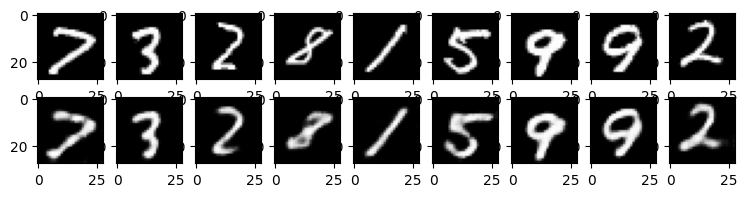

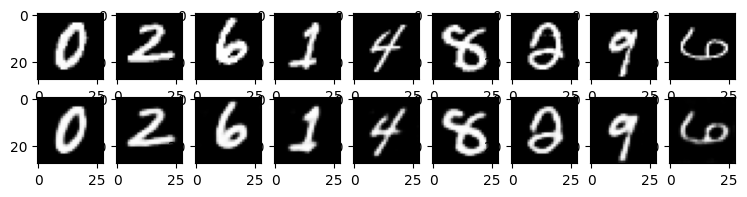

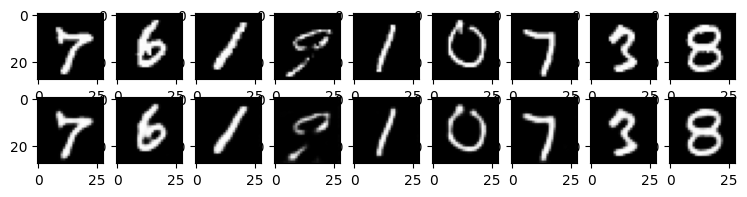

In [17]:
for k in range(0, num_epoch, 4):
  plt.figure(figsize=(9, 2))
  plt.gray()
  imgs = outputs[k][1].cpu().detach().numpy()
  recon = outputs[k][2].cpu().detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9:
      break
    plt.subplot(2, 9, i+1)
    #item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9:
      break
    plt.subplot(2, 9, 9+i+1)
    #item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])